In [4]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers.schedules import ExponentialDecay 
from keras.models import model_from_json 
import numpy as np

In [5]:
train_data_gen = ImageDataGenerator(rescale=1./255) 
validation_data_gen = ImageDataGenerator(rescale=1./255) 


In [6]:
train_generator = train_data_gen.flow_from_directory( 
	'train', 
	target_size=(48, 48), 
	batch_size=64, 
	color_mode="grayscale", 
	class_mode='categorical') 


Found 28709 images belonging to 7 classes.


In [7]:
validation_generator = validation_data_gen.flow_from_directory( 
		'test', 
		target_size=(48, 48), 
		batch_size=64, 
		color_mode="grayscale", 
		class_mode='categorical') 


Found 7178 images belonging to 7 classes.


In [12]:
emotion_model = Sequential() 

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
						input_shape=(48, 48, 1))) 
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model.add(Dropout(0.25)) 

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model.add(Dropout(0.25)) 

emotion_model.add(Flatten()) 
emotion_model.add(Dense(1024, activation='relu')) 
emotion_model.add(Dropout(0.5)) 
emotion_model.add(Dense(7, activation='softmax')) 

emotion_model.summary() 

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96) 

optimizer = Adam(learning_rate=lr_schedule) 

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
emotion_model_info = emotion_model.fit( train_generator, steps_per_epoch=28709 // 64, epochs=30, validation_data=validation_generator, validation_steps=7178 // 64) 


Epoch 1/30


C:\Users\91799\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.2395 - loss: 1.8317 - val_accuracy: 0.3334 - val_loss: 1.7193
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - accuracy: 0.2656 - loss: 1.7111 - val_accuracy: 0.1000 - val_loss: 1.8619
Epoch 3/30


C:\Users\91799\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 359s 796ms/step - accuracy: 0.3489 - loss: 1.6673 - val_accuracy: 0.4043 - val_loss: 1.5599
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.4375 - loss: 1.5614 - val_accuracy: 0.2000 - val_loss: 1.7808
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 143s 318ms/step - accuracy: 0.3993 - loss: 1.5618 - val_accuracy: 0.4361 - val_loss: 1.4824
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.3906 - loss: 1.5827 - val_accuracy: 0.7000 - val_loss: 1.2526
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 143s 318ms/step - accuracy: 0.4215 - loss: 1.4944 - val_accuracy: 0.4577 - val_loss: 1.4190
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.4688 - loss: 1.3164 - val_accuracy: 0.4000 - val_loss: 1.2140
Epoch 9/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 142s 316ms/step - accuracy: 0.4530 - loss: 1.4261 - val_accuracy: 0.4689 - val_loss: 1.3806
Epoch 10/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.4531 - loss: 1.2605 - va

In [16]:
emotion_model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.5759 - loss: 1.1299


[1.1358098983764648, 0.5724436044692993]

In [17]:
accuracy = emotion_model_info.history['accuracy'] 
val_accuracy = emotion_model_info.history['val_accuracy'] 
loss = emotion_model_info.history['loss'] 
val_loss = emotion_model_info.history['val_loss']

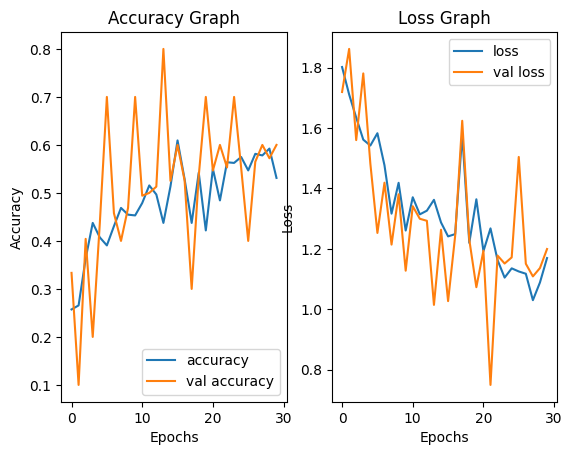

In [18]:
import matplotlib.pyplot as plt 

# Accuracy graph 
plt.subplot(1, 2, 1) 
plt.plot(accuracy, label='accuracy') 
plt.plot(val_accuracy, label='val accuracy') 
plt.title('Accuracy Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

# loss graph 
plt.subplot(1, 2, 2) 
plt.plot(loss, label='loss') 
plt.plot(val_loss, label='val loss') 
plt.title('Loss Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show() 


In [20]:
# Saving the model
import joblib
image_file = open("image_emotion.pkl","wb")
joblib.dump(emotion_model,image_file)
image_file.close()